In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load test dataset:
df = pd.read_csv('RS07082020b_08182020.csv',header=[0,1,2])
df.head()

scorer DeepCut_resnet50_GqDITC_bottomupJul22shuffle1_500000              \
  bodyparts                                                 nose               
     coords                                                    x           y   
0         0                                         499.223720    513.002140   
1         1                                         496.063441    508.125469   
2         2                                         495.281291    504.593673   
3         3                                         494.945432    501.082128   
4         4                                         493.764820    496.374335   

                                                                         \
                   pawFR                              pawFL               
  likelihood           x           y likelihood           x           y   
0   0.999999  503.919424  549.308147   0.996267  524.115105  525.015832   
1   0.999998  505.496055  550.127878   0.999458  525.032511  525.638387   
2   0.999991  508.438424  551.696865   0.999779  527.411820  526.180069   
3   0.999997  509.784084  553.401478   0.999388  529.444952  525.772427   
4   0.999994  512.501348  552.639194   0.996227  531.084946  525.059270   

                                                                         \
                   pawBR                              pawBL               
  likelihood           x           y likelihood           x           y   
0   0.999921  511.212088  587.376388   0.999994  575.681210  548.074625   
1   0.999870  511.366766  587.277622   0.999995  575.651817  547.987547   
2   0.999880  511.596043  587.257444   0.999997  575.520032  548.018566   
3   0.999965  512.273604  587.196076   0.999997  575.464219  548.092798   
4   0.999986  512.275535  586.939302   0.999997  575.797105  548.167409   

                                                 
                    tail                         
  likelihood           x           y likelihood  
0   0.999998  622.010555  663.816042   0.999997  
1   0.999999  621.839713  663.562012   0.999998  
2   0.999998  622.026721  663.685589   0.999997  
3   0.999998  622.006624  663.173934   0.999998  
4   0.999996  622.072203  663.101087   0.999998

In [3]:
# Rename columns: 
df.columns = ['frame','nose-x','nose-y','nose-likelihood','pawFR-x','pawFR-y','pawFR-likelihood',
              'pawFL-x','pawFL-y','pawFL-likelihood','pawBR-x','pawBR-y','pawBR-likelihood',
              'pawBL-x','pawBL-y','pawBL-likelihood','tail-x','tail-y','tail-likelihood']


In [4]:
# Include label column
df_labels = pd.read_csv('grooming_labels.csv')
df_labels.shape
labels = np.zeros([df.shape[0],1])
for bout in range(df_labels.shape[0]):
    labels[df_labels['Start'][bout]:df_labels['End'][bout]] = 1
df['labels'] = labels

(0, 2000)

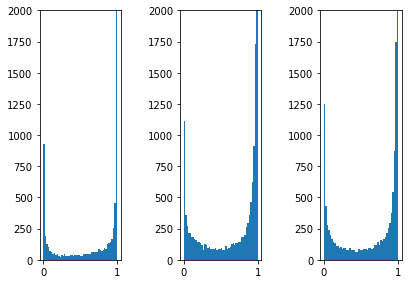

In [5]:
# Simple histograms of likelihoods: Will turn anything under 0.5 into a NaN as first pass
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.hist(df['nose-likelihood'],bins=50)
ax2.hist(df['pawFL-likelihood'],bins=50)
ax3.hist(df['pawFR-likelihood'],bins=50)
plt.tight_layout()
ax1.set_ylim([0,2000])
ax2.set_ylim([0,2000])
ax3.set_ylim([0,2000])

In [6]:
# Remove all nose locations where likelihood under 0.5 This might not be best path forward...
# df[df['nose-likelihood']<0.5]
# df['nose-x'][df['nose-likelihood']<0.5] = np.nan
# df['nose-y'][df['nose-likelihood']<0.5] = np.nan


In [7]:
# Add speed of each body part into data frame:
def get_part_speed(body_part):
    dx = df[body_part+'-x'].shift(1)-df[body_part+'-x']
    dy = df[body_part+'-y'].shift(1)-df[body_part+'-y']
    return ((dx**2 + dy**2)**0.5)

df['nose-speed'] = get_part_speed('nose')
df['pawFR-speed'] = get_part_speed('pawFR')
df['pawFL-speed'] = get_part_speed('pawFL')
df['pawBR-speed'] = get_part_speed('pawBR')
df['pawBL-speed'] = get_part_speed('pawBL')
df['tail-speed'] = get_part_speed('tail')

df.head()
# np.nanpercentile(df['nose-speed'],97),np.nanpercentile(df['tail-speed'],97)
# np.nanmin(df['nose-x']),np.nanmax(df['nose-x'])
# np.nanmin(df['nose-y']),np.nanmax(df['nose-y'])


,frame,nose-x,nose-y,nose-likelihood,pawFR-x,pawFR-y,pawFR-likelihood,pawFL-x,pawFL-y,pawFL-likelihood,...,tail-x,tail-y,tail-likelihood,labels,nose-speed,pawFR-speed,pawFL-speed,pawBR-speed,pawBL-speed,tail-speed
0,0,499.223720,513.002140,0.999999,503.919424,549.308147,0.996267,524.115105,525.015832,0.999921,...,622.010555,663.816042,0.999997,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,496.063441,508.125469,0.999998,505.496055,550.127878,0.999458,525.032511,525.638387,0.999870,...,621.839713,663.562012,0.999998,0.0,5.811134,1.776998,1.108697,0.183521,0.091905,0.306134
2,2,495.281291,504.593673,0.999991,508.438424,551.696865,0.999779,527.411820,526.180069,0.999880,...,622.026721,663.685589,0.999997,0.0,3.617367,3.334555,2.440191,0.230163,0.135387,0.224149
3,3,494.945432,501.082128,0.999997,509.784084,553.401478,0.999388,529.444952,525.772427,0.999965,...,622.006624,663.173934,0.999998,0.0,3.527570,2.171752,2.073595,0.680334,0.092873,0.512050
4,4,493.764820,496.374335,0.999994,512.501348,552.639194,0.996227,531.084946,525.059270,0.999986,...,622.072203,663.101087,0.999998,0.0,4.853571,2.822162,1.788344,0.256781,0.341145,0.098016


In [8]:
# find x-y range for all 2s bins (seems to come out to about 1000*1000)
# ax = [df['nose-x'][n:n+140].max()-df['nose-x'][n:end_frame].min() for n in range(df.shape[0]-200)]
# ay = [df['nose-y'][n:n+140].max()-df['nose-y'][n:end_frame].min() for n in range(df.shape[0]-200)]
# max(ax),max(ay)

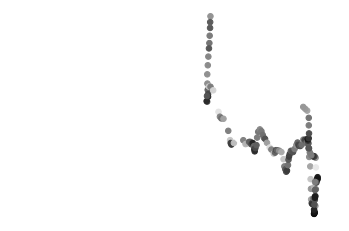

In [9]:
# Create test figure for nose
fps = 70 # frames per second
bin_size = 2 # in seconds
bin_shift = 0.5 # in seconds
# Eventually put custom clim scales: nose and tail: 0-10, back paws: 0-20, front paws: 0-25


# test frame to save as image: just ones and zeros for now (eventually do grayscale)
nose_coord = np.array(df[['nose-x','nose-y']][0:bin_size*fps],ndmin=2)
spd = np.array(df['nose-speed'][0:bin_size*fps])
x_range = np.round((df['nose-x'][0:bin_size*fps].min(),df['nose-x'][0:bin_size*fps].max()))
y_range = np.round((df['nose-y'][0:bin_size*fps].min(),df['nose-y'][0:bin_size*fps].max()))

plt.xlim(x_range[0]-500,x_range[0]+500) # hard-coded to 1000*1000 range
plt.xlim(y_range[0]-500,y_range[0]+500)

plt.scatter(df['nose-x'][0:bin_size*fps],df['nose-y'][0:bin_size*fps],s=30,cmap='gray',c=spd)
plt.axis('off')
plt.clim(0,10)
plt.savefig('./test.png')

In [27]:
# Gets label, either G (grooming) or N (non-grooming):
def get_label(bin_start,bin_end):
    if np.nanmean(df['labels'][bin_start:bin_end])<0.5:
        return 'N'
    else:
        return 'G'

# Creates image file: need to double check color range is correct and work in scaling issue
def create_image(bin_start,bin_end): # creates an RGB trajectory based on start and end bins
    size = 10
    plt.figure(figsize=(5,5))
    # NOSE IN BLUE:
    nose_coord = np.array(df[['nose-x','nose-y']][bin_start:bin_end],ndmin=2)
    nose_speed = np.array(df['nose-speed'][bin_start:bin_end])/10 # normalization factor for nose (arbitrary)
    plt.scatter(df['nose-x'][bin_start:bin_end],df['nose-y'][bin_start:bin_end],s=size,cmap='Blues',c=nose_speed)

    # FRONT PAWS IN RED:
    pawFR_coord = np.array(df[['pawFR-x','pawFR-y']][bin_start:bin_end],ndmin=2)
    pawFR_speed = np.array(df['pawFR-speed'][bin_start:bin_end])/25 # norm factor
    plt.scatter(df['pawFR-x'][bin_start:bin_end],df['pawFR-y'][bin_start:bin_end],s=size,cmap='Reds',c=pawFR_speed)
    pawLR_coord = np.array(df[['pawFL-x','pawFL-y']][bin_start:bin_end],ndmin=2)
    pawLR_speed = np.array(df['pawFL-speed'][bin_start:bin_end])/25 # norm factor
    plt.scatter(df['pawFL-x'][bin_start:bin_end],df['pawFL-y'][bin_start:bin_end],s=size,cmap='Reds',c=pawFR_speed)

    # HIND LIMBS AND TAIL IN GREEN:
    pawBR_coord = np.array(df[['pawBR-x','pawBR-y']][bin_start:bin_end],ndmin=2)
    pawBR_speed = np.array(df['pawBR-speed'][bin_start:bin_end])/20 # norm factor
    plt.scatter(df['pawBR-x'][bin_start:bin_end],df['pawBR-y'][bin_start:bin_end],s=size,cmap='Greens',c=pawFR_speed)
    pawLR_coord = np.array(df[['pawBL-x','pawBL-y']][bin_start:bin_end],ndmin=2)
    pawLR_speed = np.array(df['pawBL-speed'][bin_start:bin_end])/20 # norm factor
    plt.scatter(df['pawBL-x'][bin_start:bin_end],df['pawBL-y'][bin_start:bin_end],s=size,cmap='Greens',c=pawFR_speed)
    tail_coord = np.array(df[['tail-x','tail-y']][bin_start:bin_end],ndmin=2)
    tail_speed = np.array(df['tail-speed'][bin_start:bin_end])/10 # norm factor
    plt.scatter(df['tail-x'][bin_start:bin_end],df['tail-y'][bin_start:bin_end],s=size,cmap='Greens',c=pawFR_speed)

    # Set up color scale and axis limits:
    plt.clim(0,1)
    # x_range = np.round((df['nose-x'][bin_start:bin_end].min(),df['nose-x'][bin_start:bin_end].max()))
    # y_range = np.round((df['nose-y'][bin_start:bin_end].min(),df['nose-y'][bin_start:bin_end].max()))
    # plt.xlim(x_range[0]-300,x_range[0]+300) # hard-coded to 1000*1000 range
    # plt.ylim(y_range[0]-300,y_range[0]+300)

    # plt.xlim(0,1000) # hard-coded to 1000*1000 range
    # plt.ylim(0,1000)

    plt.axis('off')
    plt.savefig('./images/'+get_label(bin_start,bin_end)+'_'+str(bin_start)+'-'+str(bin_end)+'.png',dpi=200)
    plt.close() # turn off plotting to screen

In [30]:
# Now create image library:
bin_size = 140 # 2s at 70fps
bin_shift = 140 # 2s shift # First test will be non-overlapping bins
for start_frame in range(0,len(df)-bin_size,bin_shift):
    create_image(start_frame,start_frame+bin_size)

# TODO: 
# 1: Need to put all speeds on a common scale (find good range to set here (not normalized to peak since that will be affected by outliers)). 
# 2: Put each trajectory on common window and in same frame
# 3: fill in low confidence and large jumps with NaNs
# 4: Save some overlayed images as examples of grooming bouts

In [248]:
# This just tests getting the image back into an array. Might be able to skip creating images since I can just put everything into a tensor
# Am thinking Nose, Front, Back, Tail (W*H*4 tensors to make up one image slice in time)
from matplotlib import image
image = image.imread('test.png')
image.dtype
image.shape # This is a 4d array but only the first slice is meaningful since grayscale


(288, 432, 4)